In [0]:
import warnings 
warnings.filterwarnings('ignore')

## K-Nearest-Neighbors

KNN falls in the supervised learning family of algorithms. Informally, this means that we are given a labelled dataset consiting of training observations (x,y) and would like to capture the relationship between x and y. More formally, our goal is to learn a function h:X→Y so that given an unseen observation x, h(x) can confidently predict the corresponding output y.

In this module we will explore the inner workings of KNN, choosing the optimal K values and using KNN from scikit-learn.

## Overview

1.Read the problem statement.

2.Get the dataset.

3.Explore the dataset.

4.Pre-processing of dataset.

5.Visualization

6.Transform the dataset for building machine learning model.

7.Split data into train, test set.

7.Build Model.

8.Apply the model.

9.Evaluate the model.

10.Finding Optimal K value

11.Repeat 7,8,9 steps.

## Problem statement

### Dataset

The data set we’ll be using is the Iris Flower Dataset which was first introduced in 1936 by the famous statistician Ronald Fisher and consists of 50 observations from each of three species of Iris (Iris setosa, Iris virginica and Iris versicolor). Four features were measured from each sample: the length and the width of the sepals and petals.

**Attributes of the dataset:** https://archive.ics.uci.edu/ml/datasets/Iris

**Train the KNN algorithm to be able to distinguish the species from one another given the measurements of the 4 features.**

## Question 1

Import the data set and print 10 random rows from the data set

In [78]:
import numpy as np
import pandas as pd
import seaborn as sns
from pandas.plotting import scatter_matrix
import matplotlib
import matplotlib.pyplot as plt
from sklearn import model_selection

data = pd.read_csv('Iris.csv')

data.sample(11)

,Sepal Length (in cm),Sepal Width in (cm),Petal length (in cm),Petal width (in cm),Class
74,6.4,2.9,4.3,1.3,Iris-versicolor
77,6.7,3.0,5.0,1.7,Iris-versicolor
96,5.7,2.9,4.2,1.3,Iris-versicolor
27,5.2,3.5,1.5,0.2,Iris-setosa
41,4.5,2.3,1.3,0.3,Iris-setosa
122,7.7,2.8,6.7,2.0,Iris-virginica
11,4.8,3.4,1.6,0.2,Iris-setosa
99,5.7,2.8,4.1,1.3,Iris-versicolor
134,6.1,2.6,5.6,1.4,Iris-virginica
14,5.8,4.0,1.2,0.2,Iris-setosa


## Data Pre-processing

## Question 2 - Estimating missing values

*Its not good to remove the records having missing values all the time. We may end up loosing some data points. So, we will have to see how to replace those missing values with some estimated values (median) *

In [71]:
Iris.isnull().sum()

Sepal Length (in cm)    0
Sepal Width in (cm)     0
Petal length (in cm)    0
Petal width (in cm)     0
Class                   0
dtype: int64

## Question 3 - Dealing with categorical data

Change all the classes to numericals (0to2).

## Question 4

*Observe the association of each independent variable with target variable and drop variables from feature set having correlation in range -0.1 to 0.1 with target variable.*

In [73]:
import csv

import numpy as np
import pandas as pd

import matplotlib
from matplotlib import pyplot as plt
#matplotlib.style.use('ggplot')
import pylab
import seaborn as sns

from IPython.core.display import display, HTML


data = pd.read_csv("Iris.csv", header = 0)

Class_list = list(data["Class"].unique())
print("Types of Class: %s\n" % Class_list)

print("Dataset length: %i\n" % len(data))

print("Sepal length range:[%s, %s]\n" % (min(data["Sepal Length (in cm)"]), max(data["Sepal Length (in cm)"])))
print("Sepal width range: [%s, %s]\n" % (min(data["Sepal Width in (cm)"]), max(data["Sepal Width in (cm)"])))
print("Petal length range:[%s, %s]\n" % (min(data["Petal length (in cm)"]), max(data["Petal length (in cm)"])))
print("Petal width range: [%s, %s]\n" % (min(data["Petal width (in cm)"]), max(data["Petal width (in cm)"])))

# No feature has correlation in range -0.1 to 0.1


Types of Class: ['Iris-setosa', 'Iris-versicolor', 'Iris-virginica']

Dataset length: 150

Sepal length range:[4.3, 7.9]

Sepal width range: [2.0, 4.4]

Petal length range:[1.0, 6.9]

Petal width range: [0.1, 2.5]



## Question 5

*Observe the independent variables variance and drop such variables having no variance or almost zero variance(variance < 0.1). They will be having almost no influence on the classification.*

In [79]:
print("Sepal length variance:\t %f\n" % np.var(data["Sepal Length (in cm)"]))
print("Sepal width variance: \t %f\n" % np.var(data["Sepal Width in (cm)"]))
print("Petal length variance:\t %f\n" % np.var(data["Petal length (in cm)"]))
print("Petal width variance: \t %f\n" % np.var(data["Petal width (in cm)"]))

# No feature has zero variance or (variance < 0.1)

Sepal length variance:	 0.681122

Sepal width variance: 	 0.186751

Petal length variance:	 3.092425

Petal width variance: 	 0.578532



## Question 6

*Plot the scatter matrix for all the variables.*

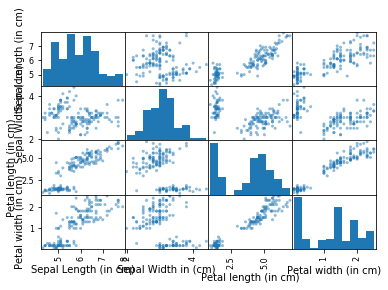

In [87]:
#sns.pairplot(data)
scatter_matrix(data)
plt.show()

## Split the dataset into training and test sets

## Question 7

*Split the dataset into training and test sets with 80-20 ratio.*

In [100]:
array = data.values
X = array[:,0:4]
Y = array[:,4]
validation_size = 0.20
seed = 7
X_train, X_validation, Y_train, Y_validation = model_selection.train_test_split(X, Y, test_size=validation_size, random_state=seed)


## Question 8 - Model

*Build the model and train and test on training and test sets respectively using **scikit-learn**. Print the Accuracy of the model with different values of **k=3,5,9**.*

**Hint:** For accuracy you can check **accuracy_score()** in scikit-learn

In [107]:
knn_3 = KNeighborsClassifier(n_neighbors=3)
knn_3.fit(X_train, Y_train)
predictions_3 = knn_3.predict(X_validation)
print(accuracy_score(Y_validation, predictions_3))

knn_5 = KNeighborsClassifier(n_neighbors=5)
knn_5.fit(X_train, Y_train)
predictions_5 = knn_5.predict(X_validation)
print(accuracy_score(Y_validation, predictions_5))

knn_9 = KNeighborsClassifier(n_neighbors=9)
knn_9.fit(X_train, Y_train)
predictions_9 = knn_9.predict(X_validation)
print(accuracy_score(Y_validation, predictions_9))


0.9
0.9
0.9


## Question 9 - Finding Optimal value of k.

Run the KNN with no of neighbours to be 1,3,5..19 and *Find the **optimal number of neighbours** from the above list using the Miss classification error

Hint:

Misclassification error (MSE) = 1 - Test accuracy score. Calculated MSE for each model with neighbours = 1,3,5...19 and find the model with lowest MSE

In [115]:
k_range = range(1, 19)
scores = []
for k in k_range:
    knn = KNeighborsClassifier(n_neighbors=k)
    knn.fit(X_train, y_train)
    y_pred = knn.predict(X_test)
    scores.append(metrics.accuracy_score(y_test, y_pred))

print(scores)

NameError: name 'y_train' is not defined

## Question 10

*Plot misclassification error vs k (with k value on X-axis) using matplotlib.*

In [0]:
import matplotlib.pyplot as plt
%matplotlib inline
plt.plot(k_range, scores)
plt.xlabel('Value of K for KNN')
plt.ylabel('Testing Accuracy')